In [427]:
#ORF 435, Final Project Nicholas Kim
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.optimize import linprog
from mpl_toolkits import mplot3d
#from cvxpy import *
from math import log
import matplotlib.pyplot as plt

In [2]:
#Problem 1
salary=250000
salary = salary * (1.022**(67-30))

def expectedSavings(lastSalary, lifeExpectancy, percentSpending):
    r = 1.032
    spending = percentSpending*lastSalary
    expectedSavings = 0
    for i in range(0,lifeExpectancy):
        val = spending/(r**(i+1))
        expectedSavings += val
        spending = spending * 1.022
    return expectedSavings
    
expectedSavings(salary, 17, 0.70)

5972470.470970963

In [33]:
#Problem 2
def p2f(x):
    if (type(x) == type("string")):
        if ('%' in x):
            return float(x.strip('%'))/100
        if (any(i.isdigit() for i in x)):
            return float(x)
    return x

dfFactors = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\HW8_factors.csv')
dfAssets = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\HW8_assets.csv')

dfFactorsNormal = dfFactors[dfFactors['Regime'] == 1]
dfFactorsCrash = dfFactors[dfFactors['Regime'] == -1]
dfAssetsNormal = dfAssets[dfAssets['Regime'] == 1]
dfAssetsCrash = dfAssets[dfAssets['Regime'] == -1]

In [34]:
dfNL = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\HW8_normalLoadings.csv')
dfCL = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\HW8_crashLoadings.csv')

In [35]:
dfNL.drop(['Unnamed: 7'], axis = 1, inplace = True)
dfNL.fillna(value = 0, inplace = True)
dfNL = dfNL.applymap(p2f)
dfNL['Expected Return'].iloc[0] = 1
dfCL.drop(['Unnamed: 7'], axis = 1, inplace = True)
dfCL.fillna(value = 0, inplace = True)
dfCL = dfCL.applymap(p2f)
dfCL['Expected Return'].iloc[0] = 1

In [36]:
assets = ['US Equities', 'US Treasuries', 'High Yield ', 'Corp Bonds', 'Real Estate','Commodities']

expectedAssetReturnsNormal = []
expectedAssetReturnsCrash = []
for asset in assets:
    expectedAssetReturnsNormal.append(np.dot(dfNL['Expected Return'], dfNL[asset]))
    expectedAssetReturnsCrash.append(np.dot(dfCL['Expected Return'], dfCL[asset]))

dfProblem2 = pd.DataFrame(columns = ['Regime'] + (assets))
dfProblem2.loc[0] = ["Normal"] + expectedAssetReturnsNormal
dfProblem2.loc[1] = ["Crash"] + expectedAssetReturnsCrash
print("Expected Asset Returns")
dfProblem2

Expected Asset Returns


,Regime,US Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities
0,Normal,0.0112,0.003,0.008,0.0046,0.0084,0.0061
1,Crash,-0.0270,0.008,-0.016,0.0029,-0.0179,-0.0080


In [37]:
dfAssetsNormal.cov()

,US Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities,Regime
US Equities,0.001279,0.000040,0.000340,0.000127,0.000729,0.000355,0.0
US Treasuries,0.000040,0.000166,0.000041,0.000157,0.000072,-0.000053,0.0
High Yield,0.000340,0.000041,0.000321,0.000134,0.000411,0.000153,0.0
Corp Bonds,0.000127,0.000157,0.000134,0.000210,0.000202,0.000008,0.0
Real Estate,0.000729,0.000072,0.000411,0.000202,0.001636,0.000111,0.0
Commodities,0.000355,-0.000053,0.000153,0.000008,0.000111,0.002799,0.0
Regime,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [38]:
dfAssetsCrash.cov()

,US Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities,Regime
US Equities,0.004245,-0.000339,0.001721,0.000276,0.004916,0.001744,0.0
US Treasuries,-0.000339,0.000284,-0.000140,0.000197,-0.000205,-0.000250,0.0
High Yield,0.001721,-0.000140,0.001754,0.000466,0.002579,0.000905,0.0
Corp Bonds,0.000276,0.000197,0.000466,0.000470,0.000637,0.000317,0.0
Real Estate,0.004916,-0.000205,0.002579,0.000637,0.010590,0.002510,0.0
Commodities,0.001744,-0.000250,0.000905,0.000317,0.002510,0.007311,0.0
Regime,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [39]:
dfProblem2

,Regime,US Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities
0,Normal,0.0112,0.003,0.008,0.0046,0.0084,0.0061
1,Crash,-0.0270,0.008,-0.016,0.0029,-0.0179,-0.0080


In [128]:
scenarioList = []
normalMeans = list(dfProblem2.iloc[0])[1:]
normalCov = dfAssetsNormal.drop(['Regime'], axis=1).cov().values
crashMeans = list(dfProblem2.iloc[1])[1:]
crashCov = dfAssetsCrash.drop(['Regime'], axis=1).cov().values

for scenario in range(10000):
    regimeIsNormal = True
    periodList = []
    recentTransition = False
    recentTransitionFactor = 1
    for period in range(12*50):
        inflationVar = np.random.normal(1.022, 0.003)
        inflationVar = inflationVar**(1/12) - 1
        tempList = [inflationVar, inflationVar]
        if regimeIsNormal: #Normal
            periodList.append(list(np.random.multivariate_normal(normalMeans, normalCov))
                                   + tempList + [int(regimeIsNormal)])
        else: #Crash
            periodList.append(list(np.random.multivariate_normal(crashMeans, crashCov))
                                   + tempList + [regimeIsNormal - 1])     
        # Regime transition
        u = np.random.uniform()
        if regimeIsNormal: #normal to crash
            if (u > 1-1/(50*recentTransitionFactor)):
                regimeIsNormal = not regimeIsNormal
                recentTransition = True
                recentTransitionFactor = 1.5
        else: #crash to normal
            if (u > 1-1/(8*recentTransitionFactor)):
                regimeIsNormal = not regimeIsNormal
                recentTransition = True
                recentTransitionFactor = 1.5
        if (recentTransitionFactor > 1):
            recentTransitionFactor -= 0.125
        
    scenarioList.append(periodList)

#for data preservation of above
with open('scenarioSimulationData_finalproj.csv', mode='w') as file:
    file.write("US Equity, US Treasuries, High Yield, Corp Bonds, Real Estate, Commodities, Inflation, Cash, Regime\n")
    for periodList in scenarioList:
        for period in periodList:
            for i in range(8):
                file.write(str(period[i]) + ",")
            file.write(str(period[8]) + "\n")

In [ ]:
########################################################################

In [3]:
#Load in scenario simulations
dfScenarios = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\scenarioSImulationData_HW8.csv')

In [12]:
len(dfScenarios.values)

6000000

In [13]:
dfScenarios.head()
scenarioList = []
periodList = []
for i, row in enumerate(dfScenarios.values):
    periodList.append((list(row)[0:-1]))
    if ((i+1) % 600 == 0):
        scenarioList.append(periodList)
        periodList = []

In [143]:
len(scenarioList)

101

In [585]:
possible_spending(expectedSavings(250000*1.022**37, 17, 0.80), 250000*1.022**37, 17 )

(0.7999999999999998, 224.1507761868702)

In [543]:
expectedSavings(250000*1.022**37, 17, 0.60)

5119260.403689398

In [353]:
def expectedSavings(lastSalary, lifeExpectancy, percentSpending):
    r = 1.032
    spending = percentSpending*lastSalary
    expectedSavings = 0
    for i in range(0,lifeExpectancy):
        val = spending/(r**(i+1))
        expectedSavings += val
        spending = spending * 1.022
    return expectedSavings

def possible_spending(savings, salary, years):
    r = 1.032
    discountSum = 0
    for i in range(1, years + 1):
        discountSum += 1.022**(i-1)/r**i
    x = savings/discountSum
    
    logUtil = 0
    for i in range(1, years + 1):
        logUtil += np.log(x*1.022**(i-1))
    return x/salary, logUtil
        
def avg_possible_spending(savingsList, salary, years):
    results = []
    for val in savingsList:
        results.append(possible_spending(val, salary, years)[0])
    return np.mean(results)

def avg_postret_util(savingsList, salary, years):
    results = []
    for val in savingsList:
        results.append(possible_spending(val, salary, years)[1])
    return np.mean(results)

def Prob_Goal(list1, goalList):
    counter = 0
    for i in range(len(list1)):
        if list1[i] >= goalList[i]:
            counter += 1
    return float(counter)/float(len(list1))

def df_all_probs(abc):
    Probs67 = []
    Probs70 = []
    Lists67 = []
    Lists70 = []
    for scenarioResultLists in year_67[6]:
        Lists67.append(scenarioResultLists[abc])
    for scenarioResultLists in year_70[6]:
        Lists70.append(scenarioResultLists[abc])
    for i in range(9):
        val67 = 0
        val70 = 0
        for j in range(len(Lists67)):
            val67 += float(Lists67[j][i])
            val70 += float(Lists70[j][i])
        Probs67.append(val67/len(Lists67))
        Probs70.append(val70/len(Lists70))
    return [Probs67, Probs70]

def Goal_Problist(salary, years, aVal, bVal, cVal):
    posSpend = [0.60, 0.625, 0.65, 0.67, 0.70, 0.725, 0.75, 0.775, 0.80]
    goalAmounts = []
    for percent in posSpend:
        goalAmounts.append(expectedSavings(salary, years, percent))
    
    results = []
    aList = []
    bList = []
    cList = []
    for goalAmount in goalAmounts:
        if (aVal > goalAmount):
            aList.append(1)
        if (bVal > goalAmount):
            bList.append(1)
        if (cVal > goalAmount):
            cList.append(1)
        if (aVal < goalAmount):
            aList.append(0)
        if (bVal < goalAmount):
            bList.append(0)
        if (cVal < goalAmount):
            cList.append(0)
    results = [aList, bList, cList]
    return results
        

def GaR(list1, goalList):
    n = len(list1)
    goalDiffs = []
    for i in range(n):
        goalDiffs.append(max(goalList[i]-list1[i],0))
    goalDiffs.sort()
    i = (int(n*0.95) - 1)
    return goalDiffs[i]

def CGaR(list1, goalList):
    n = len(list1)
    goalDiffs = []
    for i in range(n):
        goalDiffs.append(max(goalList[i]-list1[i],0))
    goalDiffs.sort()
    i = (int(n*0.95) - 1)
    return np.mean(goalDiffs[i:len(goalDiffs)])

def Downside_Risk(list1, goalList):
    n = len(list1)
    goalDiffs = []
    for i in range(n):
        if (goalList[i]-list1[i] > 0):
            goalDiffs.append((goalList[i]-list1[i]))
    return np.mean(goalDiffs)

In [378]:
#simulated wealth path results for policy rules a,b,c.
totalDataList = []
for spercent in range(7,28):
    savingPercentage = spercent*0.01
    retirementSpending = 0.60

    # 3rd last subarray is to store goals based on simulated salary
    # 4th subarray is for final salary
    # 5th subarray is for total utility
    # 6th subarray is binary 1s if passing above a certain goal percentage
    year_67 = [[],[],[],[],[],[],[]]
    year_70 = [[],[],[],[],[],[],[]]

    portfolioDistA = [0.00634255, 0.29119359, 0.14390424, 0.23731545, 0.0, 0.00577487, 0.0, 0.3154693]
    portfolioDistB = [0.0,0.40,0.20,0.20,0.0,0.0,0.0,0.20]
    portfolioDistC = [0.75,0.15,0.0,0.0,0.0,0.0,0.0,0.10]

    for index1, scenario in enumerate((scenarioList)):
        total_utility = 0
        salary = 0
        wealthA = salary*savingPercentage
        wealthB = salary*savingPercentage
        wealthC = salary*savingPercentage
        assetValuesA = [wealthA*x for x in portfolioDistA]
        assetValuesB = [wealthB*x for x in portfolioDistB]
        assetValuesC = [wealthC*x for x in portfolioDistC]
        for index2, period in enumerate(scenario):
            for i in range(8):
                assetValuesA[i] *= 1+period[i]
                assetValuesB[i] *= 1+period[i]
                assetValuesC[i] *= 1+period[i]
            wealthA = np.sum(assetValuesA)
            wealthB = np.sum(assetValuesB)
            wealthC = np.sum(assetValuesC)
            if ((index2+1) % 12 == 0): # New year
                wealthA += salary*savingPercentage
                wealthB += salary*savingPercentage
                wealthC += salary*savingPercentage
                #Bogle balance
                age = 25 + int((index2+1)/12)
                xp = (100-age)/100.0
                portfolioDistC = [xp,0.90-xp,0.0,0.0,0.0,0.0,0.0,0.10]
                if (index2 > 59):
                    total_utility += log(salary*(1-savingPercentage))*(2-i/len(scenario)) #*some scaling multiplier
            if (index2 == 59):
                salary = 250000
            if (index2 > 59):
                salary *= 1+period[7]

            for i in range(8):
                assetValuesA[i] = wealthA*portfolioDistA[i]
                assetValuesB[i] = wealthB*portfolioDistB[i]
                assetValuesC[i] = wealthC*portfolioDistC[i]
            if (index2 == 12*42-1): #67 years, life exp = 17
                year_67[0].append(np.sum(assetValuesA))
                year_67[1].append(np.sum(assetValuesB))
                year_67[2].append(np.sum(assetValuesC))
                year_67[3].append(expectedSavings(salary,17, retirementSpending))
                year_67[4].append(salary)
                year_67[5].append(total_utility)
                year_67[6].append(Goal_Problist(salary, 17, np.sum(assetValuesA),
                                                        np.sum(assetValuesB), np.sum(assetValuesC)))
            if (index2 == 12*45-1): #70 years, life exp = 15
                year_70[0].append(np.sum(assetValuesA))
                year_70[1].append(np.sum(assetValuesB))
                year_70[2].append(np.sum(assetValuesC))
                year_70[3].append(expectedSavings(salary,15, retirementSpending))
                year_70[4].append(salary)
                year_70[5].append(total_utility)
                year_70[6].append(Goal_Problist(salary, 15, np.sum(assetValuesA),
                                                        np.sum(assetValuesB), np.sum(assetValuesC)))

    horizonCols = ['Data Type', '67 years', '70 years']
    df5a = pd.DataFrame(columns = horizonCols)
    df5b = pd.DataFrame(columns = horizonCols)
    df5c = pd.DataFrame(columns = horizonCols)
    dfList = [df5a, df5b, df5c]
    savingsAmount = savingPercentage

    for i, dfTemp in enumerate(dfList):
        ProbRow = ["Probability to hit Goal", Prob_Goal(year_67[i], year_67[3]), Prob_Goal(year_70[i], year_70[3])]
        meanRow = ["Mean", np.mean(year_67[i]), np.mean(year_70[i])]
        varianceRow = ["Variance", np.var(year_67[i]), np.var(year_70[i])]
        GaRRow = ["GaR", GaR(year_67[i], year_67[3]), GaR(year_70[i], year_70[3])]
        CGaRRow = ["CGaR", CGaR(year_67[i], year_67[3]), CGaR(year_70[i], year_70[3])]
        DownsideL1Row = ["Downside Risk L1", Downside_Risk(year_67[i], year_67[3]), Downside_Risk(year_70[i], year_70[3])]
        preRetUtilRow = ["Pre-Ret Util", np.mean(year_67[5]), np.mean(year_70[5])]
        postRetUtilRow = ["Post-Ret Util", avg_postret_util(year_67[i], year_67[4], 17),
                          avg_postret_util(year_70[i], year_70[4], 15)]
        dfTemp.loc[0] = ProbRow
        dfTemp.loc[1] = meanRow
        dfTemp.loc[2] = varianceRow
        dfTemp.loc[3] = GaRRow
        dfTemp.loc[4] = CGaRRow
        dfTemp.loc[5] = DownsideL1Row
        dfTemp.loc[6] = ["Savings%", savingsAmount, savingsAmount]
        dfTemp.loc[7] = ["Total Utility", preRetUtilRow[1] + postRetUtilRow[1],
                        preRetUtilRow[2] + postRetUtilRow[2]]
        dfTemp.loc[8] = preRetUtilRow
        dfTemp.loc[9] = postRetUtilRow
        dfTemp.loc[10] = ["Max Ret. Spend %Salary", avg_possible_spending(year_67[i], year_67[4], 17),
                          avg_possible_spending(year_70[i], year_70[4], 15)]
        dfTemp.loc[11] = ["Goal Probabilities"] + df_all_probs(i)

    totalDataList.append([savingsAmount] + dfList)


In [379]:
for dataList in totalDataList:
    sav = str(dataList[0])
    if (len(sav) > 4):
        sav = sav[0:4]
    dataList[1].to_csv("part1data/" + sav +"a.csv")
    dataList[2].to_csv("part1data/" + sav + "b.csv")
    dataList[3].to_csv("part1data/" + sav + "c.csv")

In [639]:
totalDataList[14][2][0:11]

,Data Type,67 years,70 years
0,Probability to hit Goal,0.958021,0.999
1,Mean,6.62853e+06,7.93165e+06
2,Variance,9.56463e+11,1.50522e+12
3,GaR,0,0
4,CGaR,279858,821.001
5,Downside Risk L1,339828,41871
6,Savings%,0.21,0.21
7,Total Utility,1150.8,1206.38
8,Pre-Ret Util,927.329,1005.11
9,Post-Ret Util,223.47,201.264


In [569]:
totalDataList[12][2]

,Data Type,67 years,70 years
0,Probability to hit Goal,0.850075,0.991504
1,Mean,5.99724e+06,7.17626e+06
2,Variance,7.82955e+11,1.23216e+12
3,GaR,438759,0
4,CGaR,736934,35211.2
5,Downside Risk L1,384103,211267
6,Savings%,0.19,0.19
7,Total Utility,1150.94,1206.86
8,Pre-Ret Util,929.169,1007.1
9,Post-Ret Util,221.769,199.763


In [283]:
totalDataList[0][1].iloc[7][2]

1198.64189339292

In [382]:
#Find total utility as a function of savings amount of each of the three strategies
savingsList = []
aList67 = []
bList67 = []
cList67 = []
aList70 = []
bList70 = []
cList70 = []

for dataList in totalDataList:
    savingsList.append(dataList[0])
    aList67.append(dataList[1].iloc[7][1])
    aList70.append(dataList[1].iloc[7][2])
    bList67.append(dataList[2].iloc[7][1])
    bList70.append(dataList[2].iloc[7][2])
    cList67.append(dataList[3].iloc[7][1])
    cList70.append(dataList[3].iloc[7][2])

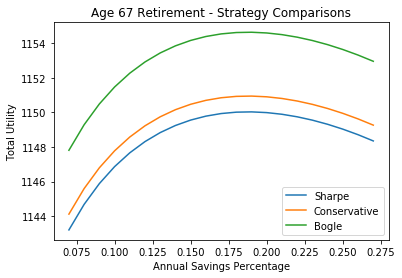

In [438]:
plt.title("Age 67 Retirement - Strategy Comparisons")
plt.ylabel("Total Utility")
plt.xlabel("Annual Savings Percentage")
plt.plot(savingsList, aList67, label = "Sharpe")
plt.plot(savingsList, bList67, label = "Conservative")
plt.plot(savingsList, cList67, label = "Bogle")
plt.legend()

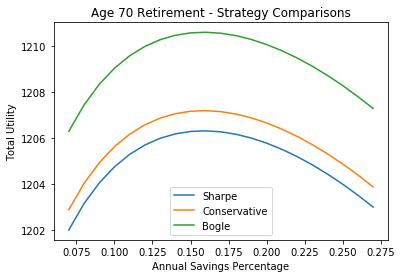

In [535]:
plt.title("Age 70 Retirement - Strategy Comparisons")
plt.ylabel("Total Utility")
plt.xlabel("Annual Savings Percentage")
plt.plot(savingsList, aList70, label = "Sharpe")
plt.plot(savingsList, bList70, label = "Conservative")
plt.plot(savingsList, cList70, label = "Bogle")
plt.legend()

In [475]:
# Getting the savings/spending contour map

for ii in range(1,4):
    for j in range(1,3):
        savingsListX = []
        percentageSpendingY = [0.60, 0.625, 0.65, 0.67, 0.70, 0.725, 0.75, 0.775, 0.80]
        probabilitiesZ = []
        for dataList in totalDataList:
            savingsListX.append(dataList[0])
            probabilitiesZ.append(dataList[ii].iloc[11][j]) #change last 1 to 2 for 67 vs 70
        X = []
        Y = []
        Z = []

        zCounter = 0
        for xVal in savingsListX:
            zList = probabilitiesZ[zCounter]
            for i in range(9):
                X.append(xVal)
                Y.append(percentageSpendingY[i])
                Z.append(zList[i])
            zCounter += 1    

        dfXYZ = pd.DataFrame(columns = ["X", "Y", "Z"])
        dfXYZ.loc[0] = [X,Y,Z]
        str1 = ""
        str2 = ""
        if (ii == 1):
            str1 = "a"
        if (ii == 2):
            str1 = "b"
        if (ii == 3):
            str1 = "c"
        if (j == 1):
            str2 = "67"
        if (j == 2):
            str2 = "70"
        dfXYZ.to_csv("plotXYZ/xyz_" + str1  + str2 +  ".csv")

In [414]:
X = []
Y = []
Z = []

zCounter = 0
for xVal in savingsListX:
    zList = probabilitiesZ[zCounter]
    for i in range(9):
        X.append(xVal)
        Y.append(percentageSpendingY[i])
        Z.append(zList[i])
    zCounter += 1      

In [424]:
dfXYZ = pd.DataFrame(columns = ["X", "Y", "Z"])
dfXYZ.loc[0] = [X,Y,Z]
dfXYZ.to_csv("plotXYZ/xyz.csv")

In [ ]:
##################################################

In [263]:
##################################################